In [1]:
## Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


Data gaps are found:
                 Time [UTC]   u100   v100    u10    v10     WS100      WS10  \
202968  2023-03-01 00:00:00  2.702 -1.762  2.581 -1.635  3.225748  3.055288   

             time  year  month       time_diff  
202968 2023-03-01  2023      3 3 days 01:00:00  


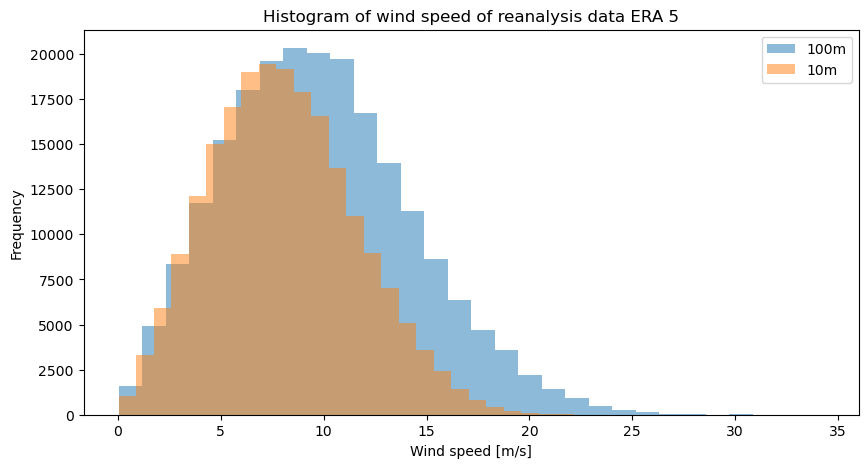

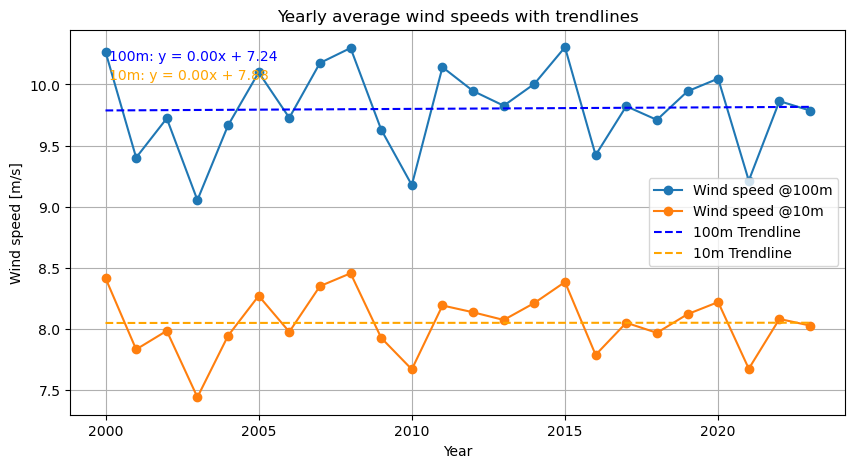


 The Average Wind Speeds over the whole period in m/s:
WS100    9.802337
WS10     8.051765
dtype: float64


In [25]:
# Function to load data from CSV files within the specified date range
def load_data(path, start_year, end_year):
    all_files = [f for f in os.listdir(path) if f.startswith('ERA5_N-9_') and f.endswith('.csv')]
    all_files.sort()
    Era5_data_list = []
    for file in all_files:
        year = int(file.split('_')[-1].split('.')[0])
        if start_year <= year <= end_year:
            Era5_data = pd.read_csv(os.path.join(path, file))
            Era5_data_list.append(Era5_data)
    return pd.concat(Era5_data_list, ignore_index=True)

# Function to calculate wind speed from u and v components
def calculate_wind_speed(Era5_data):
    Era5_data['WS100'] = np.sqrt(Era5_data['u100']**2 + Era5_data['v100']**2)
    Era5_data['WS10'] = np.sqrt(Era5_data['u10']**2 + Era5_data['v10']**2)
    return Era5_data

# Function to calculate yearly and monthly averages
def calculate_averages(Era5_data):
    Era5_data['time'] = pd.to_datetime(Era5_data['Time [UTC]'])
    Era5_data['year'] = Era5_data['time'].dt.year
    Era5_data['month'] = Era5_data['time'].dt.month
    
    yearly_avg = Era5_data.groupby('year')[['WS100', 'WS10']].mean()
    #monthly_avg = Era5_data.groupby('month')[['WS100', 'WS10']].mean()
    overall_avg = Era5_data[['WS100', 'WS10']].mean()

    return yearly_avg, overall_avg #monthly_avg

# Function to check for data gaps
def check_data_gaps(Era5_data):
    Era5_data['time_diff'] = Era5_data['time'].diff()
    gaps = Era5_data[Era5_data['time_diff'] > pd.Timedelta(hours=1)]
    return gaps

# Function to plot histograms
def plot_histogram(Era5_data):
    plt.figure(figsize=(10, 5))
    plt.hist(Era5_data['WS100'], bins=30, alpha=0.5, label='100m')
    plt.hist(Era5_data['WS10'], bins=30, alpha=0.5, label='10m')
    plt.xlabel('Wind speed [m/s]')
    plt.ylabel('Frequency')
    plt.title('Histogram of wind speed of reanalysis data ERA 5')
    plt.legend()
    plt.show()


# Function to plot yearly average wind speed with trendline
def plot_yearly_average_with_trendline(yearly_avg):
    years = yearly_avg.index
    WS100 = yearly_avg['WS100']
    WS10 = yearly_avg['WS10']
    
    # Calculate the trendline for 100m wind speed
    z_100m = np.polyfit(years, WS100, 1)
    p_100m = np.poly1d(z_100m)
    
    # Calculate the trendline for 10m wind speed
    z_10m = np.polyfit(years, WS10, 1)
    p_10m = np.poly1d(z_10m)
    
    plt.figure(figsize=(10, 5))
    
    # Plot the yearly average wind speeds
    plt.plot(years, WS100, marker='o', label='Wind speed @100m')
    plt.plot(years, WS10, marker='o', label='Wind speed @10m')
    
    # Plot the trendlines
    plt.plot(years, p_100m(years), linestyle='--', label='100m Trendline', color='blue')
    plt.plot(years, p_10m(years), linestyle='--', label='10m Trendline', color='orange')
    
    # Add trendline equations to the plot
    eq_100m = f'100m: y = {z_100m[0]:.2f}x + {z_100m[1]:.2f}'
    eq_10m = f'10m: y = {z_10m[0]:.2f}x + {z_10m[1]:.2f}'
    plt.text(0.05, 0.95, eq_100m, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', color='blue')
    plt.text(0.05, 0.90, eq_10m, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', color='orange')
    
    plt.xlabel('Year')
    plt.ylabel('Wind speed [m/s]')
    plt.title('Yearly average wind speeds with trendlines')
    plt.legend()
    plt.grid(True)
    plt.show()


## Execution
Era5_path = 'data/reanalysis'  
start_year = 2000
end_year = 2023
    
Era5_data = load_data(Era5_path, start_year, end_year)
Era5_data = calculate_wind_speed(Era5_data)
    
yearly_avg, overall_avg = calculate_averages(Era5_data)
    
gaps = check_data_gaps(Era5_data)
if not gaps.empty:
    print("Data gaps are found:")
    print(gaps)
else:
    print("No data gaps are found.")
    
plot_histogram(Era5_data)
plot_yearly_average_with_trendline(yearly_avg)


print("\n The Average Wind Speeds over the whole period in m/s:")
print(overall_avg)

#print("Yearly average wind speeds are:")
#print(yearly_avg)
